## Implementation of Classification problem using Wine Quality Dataset mainly by SVC (Support Vector Classifier) and the accuracy is compared with Logistic Regression

In [57]:
# Importing necessry libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [58]:
# df = pd.read_csv("https://raw.githubusercontent.com/shrikant-temburwar/Wine-Quality-Dataset/master/winequality-red.csv",sep=';')

data=pd.read_csv("https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv")

In [59]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## EDA

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [61]:
# finding how many unique categories of the output feature

data.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [62]:
# finding the count of rows of each category

data.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [63]:
# fetching the column names of the dataset

data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [64]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [65]:
## Checking missing values

data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

C:\Users\bharg\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bharg\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bharg\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

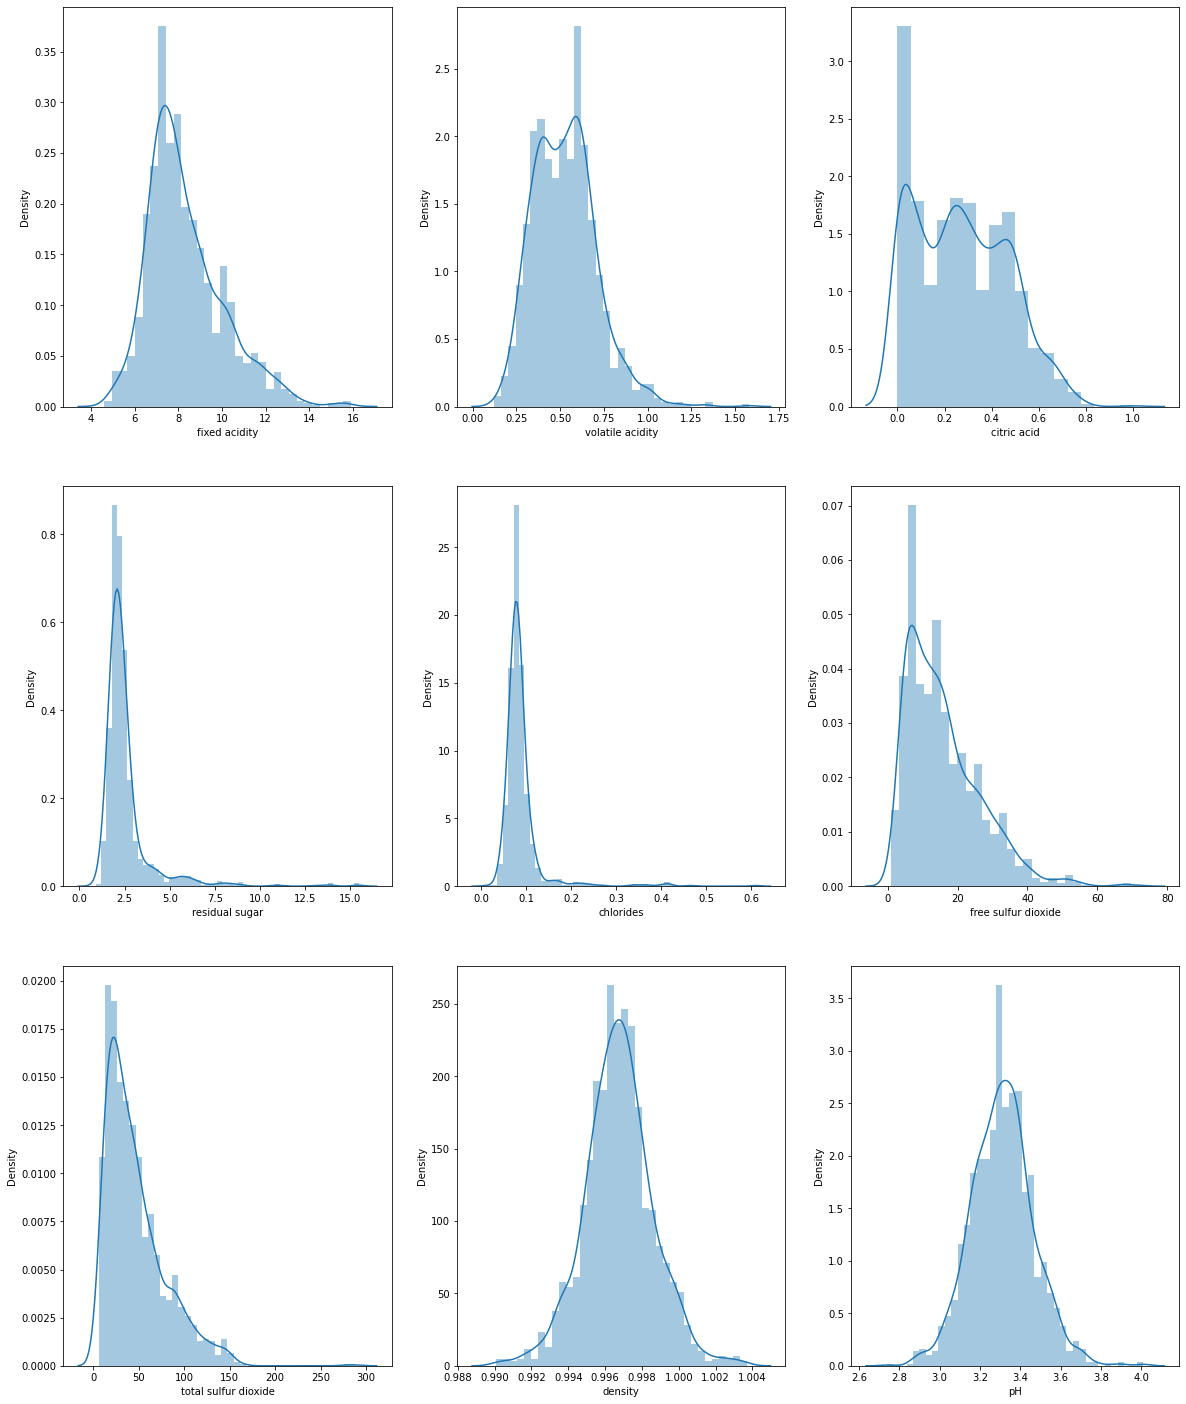

In [66]:
## Visualizing the distribution of all columns together using for loop of columns through distribution plot 

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for i in data:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[i])
        plt.xlabel(i)
    plotnumber = plotnumber+1
plt.show()

<AxesSubplot:>

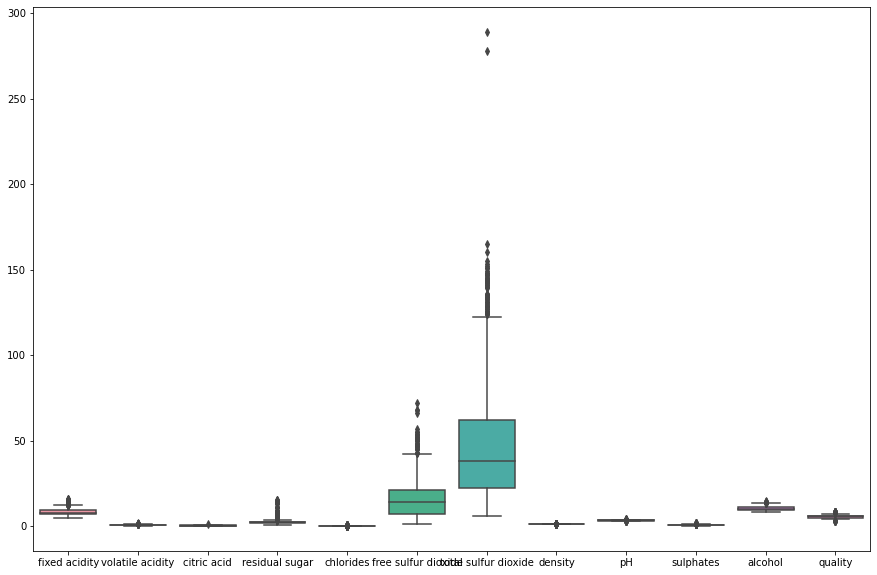

In [67]:
## Finding outliers using Box plot (subplot to display all columns together in single plot)

fig,ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data,ax=ax)

In [68]:
## Removing outliers from necessary columns together using IQR method

cols = ['fixed acidity' , 'residual sugar' , 'free sulfur dioxide' , 'total sulfur dioxide' ] # The columns which outliers to be removed

# Calculate quantiles and IQR
Q1 = data[cols].quantile(0.25) # Same as np.percentile but maps (0,1) and not (0,100)
Q3 = data[cols].quantile(0.75)
IQR = Q3 - Q1

# Return a boolean array of the rows with (any) non-outlier column values
condition = ~((data[cols] < (Q1 - 1.5 * IQR)) | (data[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter our dataframe based on condition
filtered_dataset = data[condition]

In [69]:
filtered_dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


<AxesSubplot:>

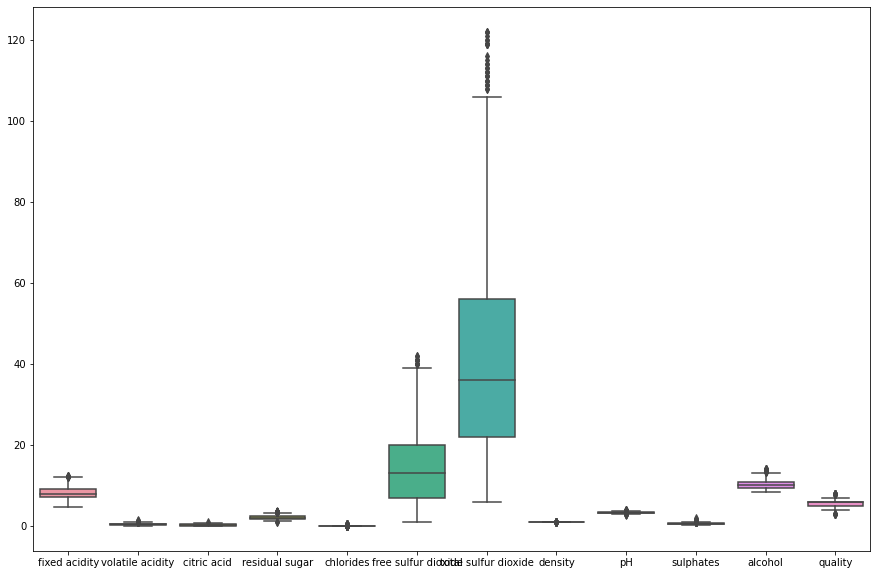

In [70]:
## Ensuring outliers are removed using Box plot (subplot to display all columns together in single plot)

fig,ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=filtered_dataset,ax=ax)

In [71]:
## Checking whether the dataset is balance or imbalanced based on the target column

filtered_dataset.groupby(['quality'])['quality'].count()

## As we have almost equal ncount of values on both categories, it is balanced dataset, hence Performance metrics of Accuracy would be suffice.

quality
3      8
4     44
5    565
6    564
7    160
8     15
Name: quality, dtype: int64

<AxesSubplot:>

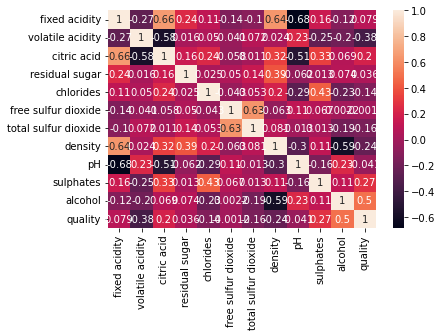

In [72]:
## Finding the correlation between the features

sns.heatmap(filtered_dataset.corr(),annot = True)

In [73]:
filtered_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1356 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1356 non-null   float64
 1   volatile acidity      1356 non-null   float64
 2   citric acid           1356 non-null   float64
 3   residual sugar        1356 non-null   float64
 4   chlorides             1356 non-null   float64
 5   free sulfur dioxide   1356 non-null   float64
 6   total sulfur dioxide  1356 non-null   float64
 7   density               1356 non-null   float64
 8   pH                    1356 non-null   float64
 9   sulphates             1356 non-null   float64
 10  alcohol               1356 non-null   float64
 11  quality               1356 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 137.7 KB


In [74]:
## Defining Independent and Dependent Features using drop colum method

X = filtered_dataset.drop(columns = ['quality'])
y = filtered_dataset['quality']

In [75]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1356, dtype: int64

In [76]:
## Splitting the dataset into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [77]:
## Scaling the dataset

## Standardize the dataset (Feature scaling)

from sklearn.preprocessing import StandardScaler

# Standard Scaler - it centralize the data where Mean=0 and Std Dev = 1 from where distribution happens

## create object
scaler = StandardScaler()
scaler

StandardScaler()

In [78]:
X_train = scaler.fit_transform(X_train)
X_train

# Only Independent fetautes to be scaled
# Independent features from trained dataset to be scaled and transformed as per z score formula
# Independent features from test dataset to be only transformed

array([[-1.41241626,  0.65335623, -1.09162251, ...,  1.27798199,
         0.78303358,  0.18174152],
       [-0.67827733, -0.30458514, -1.36295928, ...,  0.48778271,
        -0.4571452 ,  0.46634279],
       [-1.47915616, -0.47363362, -1.36295928, ...,  1.01458223,
         1.21709616,  1.22527951],
       ...,
       [-0.14435811, -1.31887601,  1.29614111, ..., -0.10486676,
         0.10093526, -0.29259393],
       [-0.14435811, -1.20617703,  0.37359607, ...,  0.55363265,
        -0.58116307,  2.07908331],
       [-1.41241626, -0.13553667, -1.36295928, ...,  0.22438295,
        -1.2632614 , -0.86179646]])

In [79]:
X_test = scaler.transform(X_test)
X_test

array([[ 0.45630101, -0.69903159,  0.80773491, ...,  0.75118247,
        -0.08509156, -1.14639773],
       [ 0.79000052, -1.09347804,  1.07907169, ..., -0.96091598,
         1.46513191,  0.65607697],
       [-0.67827733,  0.82240471, -1.36295928, ...,  0.75118247,
        -0.70518095, -0.95666355],
       ...,
       [-0.34457782,  1.07597743, -1.36295928, ...,  1.01458223,
        -0.02308262,  0.94067824],
       [ 0.52304091,  1.78034609,  0.48213078, ..., -1.35601562,
        -1.07723459, -1.24126482],
       [-0.14435811, -1.93872043,  0.80773491, ...,  0.02683313,
         1.71316767,  0.84581115]])

## Model training using SVC

In [80]:
## create object

from sklearn.svm import SVC
SVM_Classifier = SVC()

In [81]:
## Train the training data with SVM Classifier

SVM_Classifier.fit(X_train,y_train)

SVC()

In [82]:
## Finding the accuracy of training data

SVM_Classifier.score(X_train,y_train)

0.6916299559471366

In [83]:
## Prediction for the test data

y_pred = SVM_Classifier.predict(X_test)
y_pred

array([5, 7, 5, 6, 7, 5, 5, 6, 5, 6, 6, 6, 5, 5, 5, 6, 5, 6, 6, 5, 5, 5,
       5, 5, 6, 6, 5, 6, 5, 5, 5, 6, 6, 5, 5, 6, 5, 6, 5, 5, 5, 6, 6, 5,
       5, 7, 5, 6, 5, 6, 6, 6, 7, 5, 6, 6, 5, 6, 6, 6, 6, 6, 5, 6, 6, 5,
       6, 6, 6, 6, 5, 6, 5, 5, 6, 5, 5, 6, 6, 6, 5, 5, 6, 6, 5, 6, 5, 5,
       5, 5, 6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 5, 5, 5, 5, 5, 6, 6, 6, 5,
       6, 5, 6, 5, 5, 6, 6, 5, 6, 6, 6, 5, 5, 6, 5, 7, 5, 5, 6, 5, 5, 6,
       6, 5, 6, 5, 7, 6, 7, 5, 6, 5, 5, 5, 6, 5, 5, 6, 6, 5, 5, 5, 6, 6,
       5, 5, 6, 5, 6, 5, 6, 6, 5, 6, 6, 5, 6, 6, 5, 5, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 5, 6, 5, 5, 5, 5, 6, 6, 5, 6, 5, 6, 6, 5, 5, 6, 6, 6, 6,
       5, 5, 5, 5, 5, 6, 6, 6, 6, 5, 6, 5, 5, 6, 6, 5, 5, 6, 5, 5, 5, 6,
       5, 6, 6, 5, 5, 6, 6, 5, 6, 5, 6, 7, 6, 5, 6, 6, 6, 6, 5, 6, 5, 5,
       6, 5, 6, 7, 6, 5, 6, 6, 5, 6, 6, 5, 5, 6, 5, 7, 6, 5, 6, 6, 5, 5,
       6, 6, 5, 6, 6, 6, 6, 5, 5, 7, 6, 6, 6, 5, 5, 6, 7, 5, 5, 6, 6, 6,
       5, 5, 5, 5, 6, 5, 6, 6, 5, 6, 6, 5, 5, 5, 6,

## Performance metrics

In [84]:
from sklearn.metrics import accuracy_score

## Calculating Accuracy

accuracy_svc = accuracy_score(y_test,y_pred)
accuracy_svc

0.609375

## Comparing the accuracy with Logistic Regression

In [85]:
## create object

logistic_reg = LogisticRegression()
logistic_reg

LogisticRegression()

In [86]:
## Train the training data with logistic regression

logistic_reg.fit(X_train,y_train)

LogisticRegression()

In [87]:
## Prediction for the test data

y_pred_lg = logistic_reg.predict(X_test)
y_pred_lg

array([5, 7, 5, 6, 7, 5, 5, 5, 5, 6, 5, 7, 5, 6, 5, 6, 5, 6, 6, 5, 5, 5,
       5, 5, 7, 6, 5, 6, 5, 5, 5, 6, 6, 5, 5, 6, 5, 6, 5, 5, 5, 7, 6, 5,
       5, 7, 5, 6, 5, 6, 5, 6, 7, 5, 5, 6, 5, 5, 6, 6, 6, 6, 5, 6, 6, 5,
       6, 6, 7, 7, 5, 6, 5, 5, 6, 5, 5, 6, 6, 6, 5, 5, 6, 6, 5, 5, 4, 5,
       5, 5, 5, 6, 6, 6, 5, 6, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 6, 6, 6, 5,
       6, 5, 6, 5, 5, 6, 6, 5, 6, 6, 5, 5, 6, 6, 5, 7, 5, 5, 6, 5, 3, 6,
       6, 5, 6, 5, 7, 6, 6, 5, 6, 6, 5, 5, 6, 6, 6, 6, 6, 5, 5, 5, 6, 6,
       5, 5, 6, 5, 6, 5, 6, 6, 5, 6, 5, 5, 6, 6, 5, 5, 6, 5, 6, 6, 6, 6,
       6, 6, 6, 5, 6, 5, 5, 5, 5, 6, 6, 5, 6, 5, 6, 6, 5, 6, 6, 6, 6, 6,
       6, 5, 5, 5, 6, 6, 7, 6, 6, 5, 6, 6, 5, 6, 6, 5, 5, 6, 5, 5, 5, 6,
       5, 6, 6, 5, 5, 6, 6, 5, 6, 6, 6, 6, 6, 5, 6, 6, 5, 6, 5, 6, 6, 5,
       6, 6, 6, 7, 6, 5, 6, 6, 6, 6, 7, 5, 5, 6, 5, 7, 6, 5, 6, 6, 5, 5,
       6, 6, 5, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 6, 6, 7, 5, 5, 6, 6, 5,
       5, 5, 5, 5, 5, 5, 6, 7, 5, 6, 7, 5, 5, 5, 7,

In [89]:
## Finding the accuracy of training data

logistic_reg.score(X_train,y_train)

0.6123348017621145

In [90]:

## Calculating Accuracy

accuracy_logistic_reg = accuracy_score(y_test,y_pred_lg)
accuracy_logistic_reg

0.6227678571428571

## Insights

#### The accuracy of the classification problem using SVC is less than when implementing with Logistic Regression.
#### SVC  has 60% accuracy and Logistic Regression has 62% accuracy.